### TDOA based method for source location estimation

In this method, the measurement is made for time of arrival of waves. (Let us say P wave onset). (Error is present)
As a first try we'll implement this method for known receiver positions. A modified method for receiver locations with errors will be implemented next.


In [1]:
# importing required libraries

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def src_Loc(rec_pos, t_rec,c,src_pos):
    '''The function returns the difference between the position of source(guessed) and receiver location as calculated from 
    measurement of time difference of arrival with the distance calculated from position of source and receiver. We aim to 
    minimise this quantity

    rec_pos = a matrix with position of receivers stored in the following format [[x_1, y_1],[x_2,y_2]]
    t_rec  = the time of arrival as measured from data
    source_loc = the guessed source location for which the function is being evaluated
    
    '''
    
    n_rec = np.shape(rec_pos)[0]
    t_rec_rel1 = np.zeros(shape=(n_rec-1,1))   # time difference calculated wrt the value in first receiver
    
    t_rec_rel1[:] = t_rec[1:] -t_rec[0]     
    
    rec_pos_src_rel = np.zeros(shape =(n_rec-1,2)) # Calculating the relative position of recivers wrt the source
    
    rec_pos_src_rel[:] = rec_pos[1:] -src_pos*np.ones_like(rec_pos_src_rel)  # relative position of receiver 1 wrt the source
    
    rec1_pos_src_rel = rec_pos[0] -src_pos # the position of receiver one wrt the source
    
    rec_dist_src_rel = np.zeros(shape=(n_rec-1,1))
    
    rec1_dist_src_rel = np.sqrt(rec1_pos_src_rel[0]**2 + rec1_pos_src_rel[1]**2)
    
    rec_dist_src_rel[:] = np.sqrt(rec_pos_src_rel[:,0]**2 + rec_pos_src_rel[:,1]**2).reshape(n_rec-1,1)
    
    delta_r = t_rec_rel1*c
    
    error = np.zeros(shape =(n_rec-1,1))   # defing the error to be minimized
    error[:] = delta_r[:] - (rec_dist_src_rel[:]-rec1_dist_src_rel)   
    
    error_to_min =np.dot(error.T,error) # Getting a single value instead of an array
    
    return error_to_min
        

In [3]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos = np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
noise_t = np.random.normal(loc=0.0,scale =2,size = (3,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation



In [4]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-2:2:10j,-2:2:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

C:\Users\anmol harshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: No contour levels were found within the data range.
  """Entry point for launching an IPython kernel.


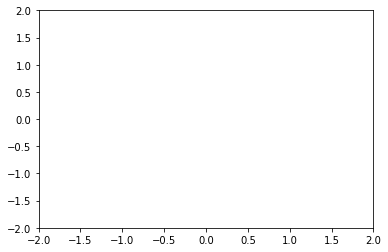

In [5]:
plt.contour(x,y,error,levels=10)

We find that for this test case a single value is reported as the receivers are all at same place(undetermined problem). Now tweaking the ealier code abit so that the receivers are at different positions.

In [6]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos = np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos[0,:] = [3,0]
rec_pos[1,:] = [0,2]
rec_pos[2,:] = [-1,0]
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1]).reshape(3,1)
noise_t = np.random.normal(loc=0.0,scale =2,size = (3,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation


In [7]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

Text(0.5, 1.0, 'Contour Plot for error only in time of arrival')

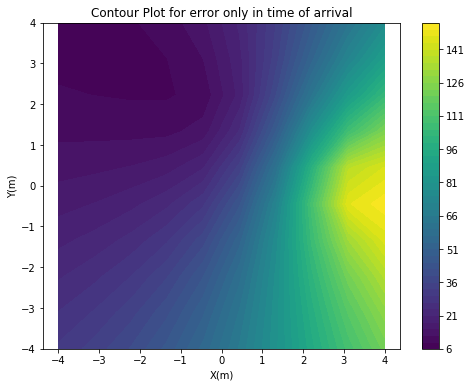

In [8]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Contour Plot for error only in time of arrival')

This result was from a very coarse grid, let us choose a finer grid and see the result. We see that there is quite low value for error around origin which is expected.

In [9]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:40j,-4:4:40j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(40,40))  # To store the values at various points

for i in range(40):
    for j in range(40):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

Text(0.5, 1.0, 'Error contour plot for error only in time of arrival')

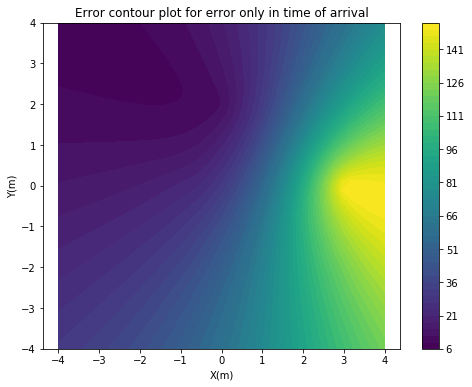

In [10]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour plot for error only in time of arrival')

Nothing much furhter can be said about it. There is still low error reqion around origin. The uncertainity is low along the x axis due to the presence of 2 receivers on this axis. There is only one receiver on y axis and hence greater uncertainity is there in y direction. Let us test it by adding one more receiver in y direction. 

In [11]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos = np.zeros(shape =(4,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos[0,:] = [3,0]
rec_pos[1,:] = [0,2]
rec_pos[2,:] = [-1,0]
rec_pos[3,:] = [0,-2]
t_rec_ideal = np.zeros(shape =(4,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1,2]).reshape(4,1)
noise_t = np.random.normal(loc=0.0,scale =2,size = (4,1))
t_Rec_real = t_rec_ideal + noise_t

c = 1 # velocity of propagation


In [12]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc(rec_pos=rec_pos,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]))

Text(0.5, 1.0, 'Error contour for error only in time of arrival')

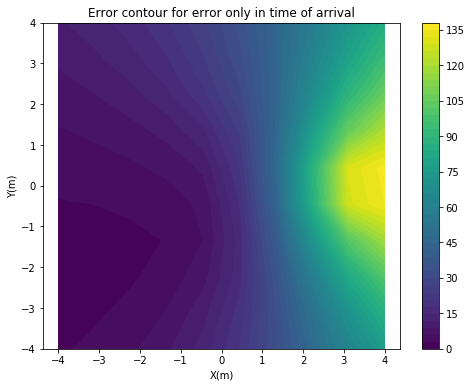

In [13]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for error only in time of arrival')

We see that the innermost contour for low values is quite smaller and much more symmetric than in the previous case. We also note that the towards the reciever with greatest value, the error is higher. 

General comment wrt noise magnitude: Adding noise of magnitude 2 leaves most of the results quite rough. Noise of lower magnitude (0.2 and 0.02) give much clearer picture, however noise reduction from 0.2 to 0.02 didn't give any significant advantage. (Need to test this multiple times, with multiple values.)

#### Adding error in the receiver locations

Implementation of modified algorithm to encounter the error in source receivers.

In [14]:
def src_Loc_recpos_error(rec_pos_mes, t_rec,c,src_pos,rec_pos_act):
    '''The function returns the difference between the position of source(guessed) and receiver location as calculated from 
    measurement of time difference of arrival with the distance calculated from position of source and receiver. We aim to 
    minimise this quantity

    rec_pos_mes = a matrix with  measured position of receivers stored in the following format [[x_1, y_1],[x_2,y_2]]
    (contains error)
    t_rec  = the time of arrival as measured from data
    source_loc = the guessed source location for which the function is being evaluated
    rec_pos_act = the actual receiver position
    
    '''
    
    n_rec = np.shape(rec_pos_mes)[0]
    t_rec_rel1 = np.zeros(shape=(n_rec-1,1))   # time difference calculated wrt the value in first receiver
    
    t_rec_rel1[:] = t_rec[1:] - t_rec[0]     
    
    rec_pos_src_rel = np.zeros(shape =(n_rec-1,2)) # Calculating the relative position of recivers wrt the source
    
    rec_pos_src_rel[:] = rec_pos_mes[1:] -src_pos*np.ones_like(rec_pos_src_rel)  # relative position of receiver 1 wrt the source
    
    rec1_pos_src_rel = rec_pos_mes[0] -src_pos # the position of receiver one wrt the source
    
    rec_dist_src_rel = np.zeros(shape=(n_rec-1,1))
    
    rec1_dist_src_rel = np.sqrt(rec1_pos_src_rel[0]**2 + rec1_pos_src_rel[1]**2)
    
    rec_dist_src_rel[:] = np.sqrt(rec_pos_src_rel[:,0]**2 + rec_pos_src_rel[:,1]**2).reshape(n_rec-1,1)
    
    delta_r = t_rec_rel1*c
    error_rec_pos = np.zeros(shape =(n_rec,2)) # error in position of the receiver
    error_rec_pos[:,:] = rec_pos_mes[:,:] - rec_pos_act[:,:]
    error_rec_dist =np.zeros(shape =(n_rec,1))
    error_rec_dist[:]= np.sqrt(error_rec_pos[:,0]**2 + error_rec_pos[:,1]**2).reshape(n_rec,1)
    error = np.zeros(shape =(n_rec-1,1))   # defing the error to be minimized
    error[:] = delta_r[:] - (rec_dist_src_rel[:]-rec1_dist_src_rel)   
    
    error_to_min =np.dot(error.T,error) +np.dot(error_rec_dist.T,error_rec_dist)# Getting a single value instead of an array
    
    return error_to_min
        

In [15]:
# testing the above function for the case of all the three receivers and the source at a single place

rec_pos_act= np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[0,:] = [3,0]
rec_pos_act[1,:] = [0,2]
rec_pos_act[2,:] = [-1,0]
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1]).reshape(3,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (3,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (3,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation


In [16]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_act)

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

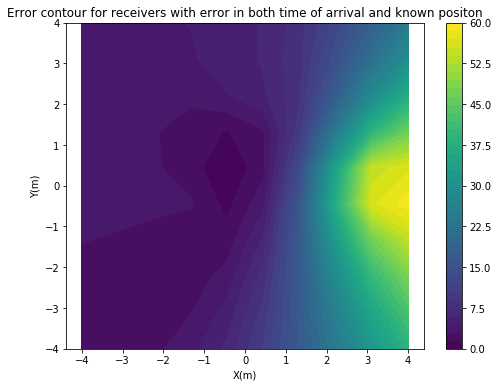

In [17]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

In [18]:
#Trying a variation of the above function, in which the actual positions of receivers are used in error calculation.

def src_Loc_recpos_error_2(rec_pos_mes, t_rec,c,src_pos,rec_pos_act):
    '''The function returns the difference between the position of source(guessed) and receiver location as calculated from 
    measurement of time difference of arrival with the distance calculated from position of source and receiver. We aim to 
    minimise this quantity

    rec_pos_mes = a matrix with  measured position of receivers stored in the following format [[x_1, y_1],[x_2,y_2]]
    (contains error)
    t_rec  = the time of arrival as measured from data
    source_loc = the guessed source location for which the function is being evaluated
    rec_pos_act = the actual receiver position
    
    '''
    
    n_rec = np.shape(rec_pos_mes)[0]
    t_rec_rel1 = np.zeros(shape=(n_rec-1,1))   # time difference calculated wrt the value in first receiver
    
    t_rec_rel1[:] = t_rec[1:] - t_rec[0]     
    
    rec_pos_src_rel = np.zeros(shape =(n_rec-1,2)) # Calculating the relative position of recivers wrt the source
    
    rec_pos_src_rel[:] = rec_pos_act[1:] -src_pos*np.ones_like(rec_pos_src_rel)  # relative position of receiver 1 wrt the source
    
    rec1_pos_src_rel = rec_pos_act[0] -src_pos # the position of receiver one wrt the source
    
    rec_dist_src_rel = np.zeros(shape=(n_rec-1,1))
    
    rec1_dist_src_rel = np.sqrt(rec1_pos_src_rel[0]**2 + rec1_pos_src_rel[1]**2)
    
    rec_dist_src_rel[:] = np.sqrt(rec_pos_src_rel[:,0]**2 + rec_pos_src_rel[:,1]**2).reshape(n_rec-1,1)
    
    delta_r = t_rec_rel1*c
    error_rec_pos = np.zeros(shape =(n_rec,2)) # error in position of the receiver
    error_rec_pos[:,:] = rec_pos_mes[:,:] - rec_pos_act[:,:]
    error_rec_dist =np.zeros(shape =(n_rec,1))
    error_rec_dist[:]= np.sqrt(error_rec_pos[:,0]**2 + error_rec_pos[:,1]**2).reshape(n_rec,1)
    error = np.zeros(shape =(n_rec-1,1))   # defing the error to be minimized
    error[:] = delta_r[:] - (rec_dist_src_rel[:]-rec1_dist_src_rel)   
    
    error_to_min =np.dot(error.T,error) +np.dot(error_rec_dist.T,error_rec_dist)# Getting a single value instead of an array
    
    return error_to_min
        

In [19]:


rec_pos_act= np.zeros(shape =(3,2))  # Let us say that there are 3 reeivers placed at origin
rec_pos_act[0,:] = [3,0]
rec_pos_act[1,:] = [0,2]
rec_pos_act[2,:] = [-1,0]
t_rec_ideal = np.zeros(shape =(3,1))  # ideal value at receivers
t_rec_ideal[:] = np.array([3,2,1]).reshape(3,1)
noise_t = np.random.normal(loc=0.0,scale =0.2,size = (3,1))
noise_r = np.random.normal(loc=0.0,scale =0.2,size = (3,2))
t_Rec_real = t_rec_ideal + noise_t
rec_pos_mes= rec_pos_act +noise_r

c = 1 # velocity of propagation


In [20]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points

for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_act)

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

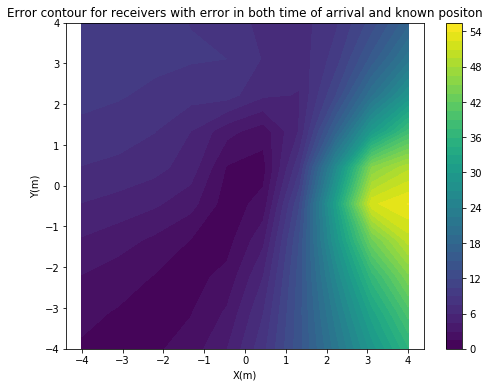

In [21]:
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

Further we will have the following information more about the receivers:

1. The magnitude of received signal. 

2. (Probably) S wave onset. 

The importance is that once we have got certain positions for receivers and some position for source, these additional informations can further help in reducing error in the required quantities. Once we have a sense of receivers' position , we can talk more comfortably about the magnitude. 

However, a point to note here is that we have directly entered the correct position of the receivers which won't be the case in real scenario. In real case, we might have to make some guess for the correct positions and iterate over it. A possible approach in this regard is the following:
The guessed positions for the receivers are true. For the above case, we had measured positions, however we won't be having that. Hence, let us say that a reasonable guess is made based on the time difference of arrival. We can then do computation with these positions, after we have got a value for source,then we proceed with the second part, iterate over a small region around a single receiver and then perform these iterations over other receivers. 

First, let's try to iterate over the same process with random placement of receivers and check the result. Or even before that let's test the method for slightly different position of receiver (other than correct) being fed as the correct value. 

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

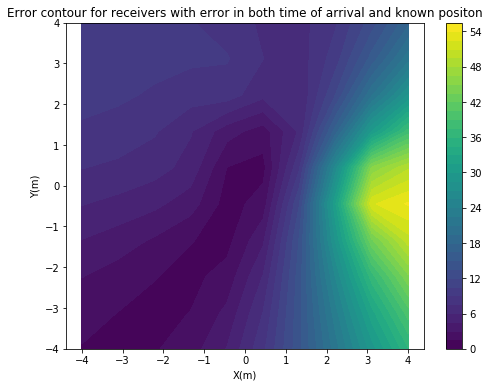

In [22]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [0.2 ,0.2]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

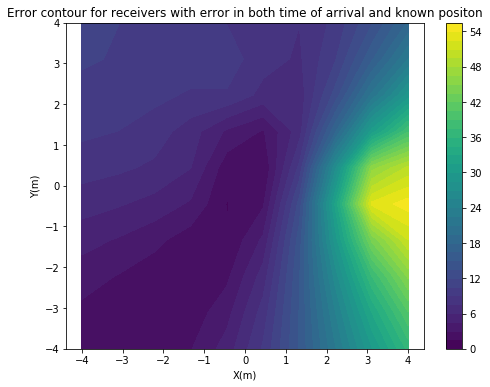

In [29]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [0.4 ,0.4]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

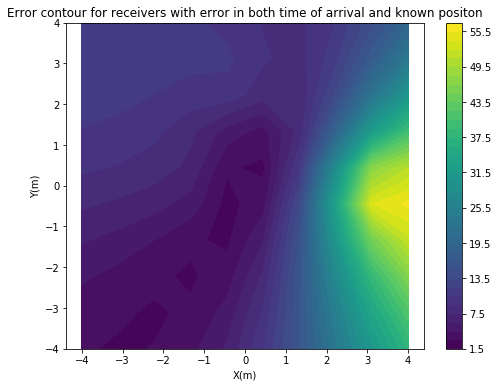

In [24]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [0.6 ,0.6]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

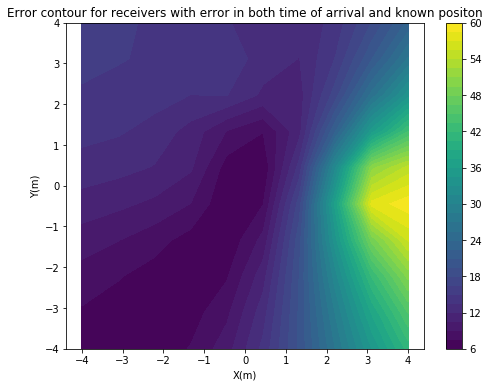

In [25]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [1 ,1]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

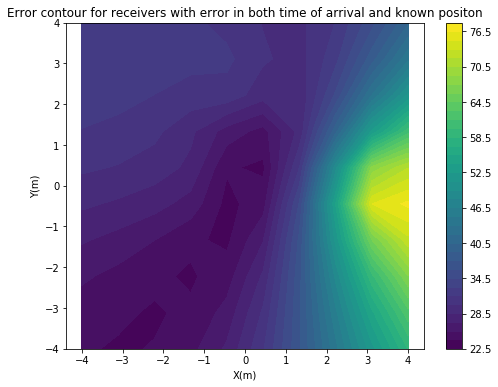

In [27]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [2 ,2]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_modified)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known positon')

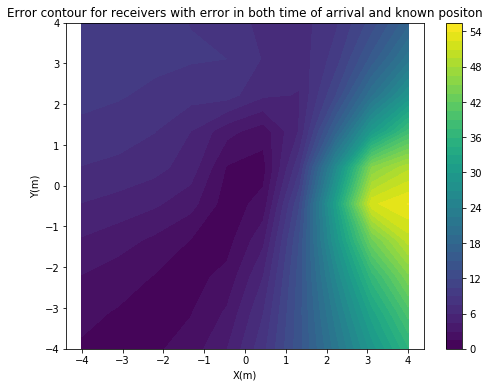

In [28]:
# Now evaluating the function at various points in 2D

x,y =np.mgrid[-4:4:10j,-4:4:10j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(10,10))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:] + [4 ,4]
for i in range(10):
    for j in range(10):
        error[i,j] = src_Loc_recpos_error(rec_pos_mes=rec_pos_mes,t_rec=t_Rec_real,c=c,src_pos=np.array([x[i,j],y[i,j]]),rec_pos_act=rec_pos_act)
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known positon')

Observing the above graphs, it looks like the pattern of error and the overall magnitude is not effected much. Need to check for the correctness. 